# Notebook 8: High Res Stellar Ages and Properties Exploration

This notebook will  be exploring the young stars in the h329 galaxy at the present day redshift. We will be looking into the other properties and graphs that relate to stellar age (from our last notebook investigations).

## Setup 

In [1]:
import astropy

import matplotlib.pyplot as plt
import h5py
import pynbody
from pynbody.analysis import profile
from scipy.optimize import curve_fit

from morgans_sim_setup import *
import numpy as np
import pandas as pd

In [2]:
plt.style.use('bmh')

In [3]:
## Pathway to the simulation galaxy data: 

path_to_h329 = '/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096'
## We are using 4096 present day timestep and simulation data with only gas and star particles

h329, h329_h, h329_h1 = sim_setup(path_to_h329)

loading sim
doing units
selecting halos
making faceon


In [4]:
## Setting up disk filter (walked through in Notebook 2)

radius_d = 30
height_d = 2 ## thickness height is centered on the center defined below
center_d = (0,0,0)
f_disk = pynbody.filt.Disc(radius_d, height_d, center_d)

## Filtered disk of h329
h329_s_disk = h329.s[f_disk]

In [5]:
## Now setting up vertical profiles using our filters (created in cell above) on h329 galaxy

h329_p_s_vert_sliced = profile.VerticalProfile(h329_s_disk, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_sliced = pynbody.analysis.profile.Profile(h329_s_disk, vmin =.01) ## radial profile

In [6]:
## Also will be looking a bit at metallicity so need to make a gas particles profile

h329_g_disk = h329.g[f_disk] ## make sliced disk of gas particles

h329_p_g_sliced = pynbody.analysis.profile.Profile(h329_g_disk, vmin =.01) ## radial profile

## Background

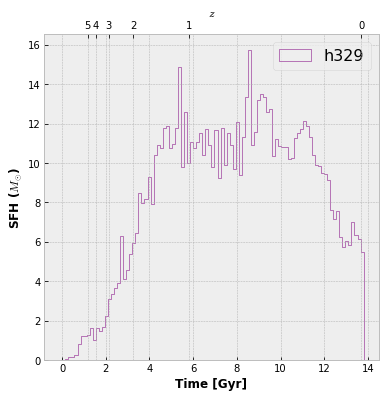

In [6]:
## Star formation history

fig = plt.figure(figsize=[6,6])

pynbody.plot.stars.sfh(h329_s_disk,bins=100, color='purple', label = 'h329')
plt.legend(fontsize=16)
plt.xlabel('Time [Gyr]', fontweight='bold')
plt.ylabel(r'SFH ($M_{\odot}$)', fontweight='bold')
plt.tick_params(axis='both', which='major')

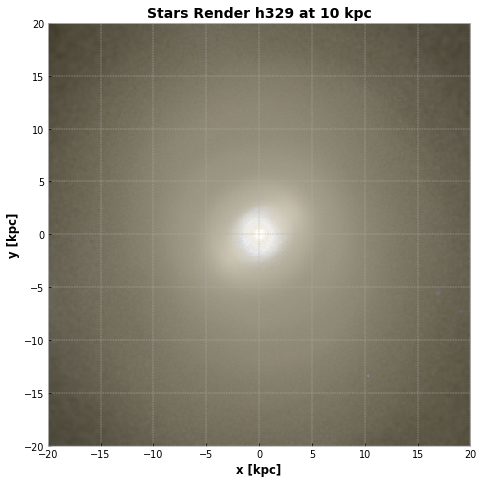

In [7]:
fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_s_disk, width = '40 kpc', dynamic_range = 8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 at 10 kpc', fontweight='bold');

## Stellar Render Side-On Using h329 Disk with Filter

/home1/09216/mmiller1/.local/lib/python3.7/site-packages/pynbody/plot/stars.py:72: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(image*pc2_to_sqarcsec)


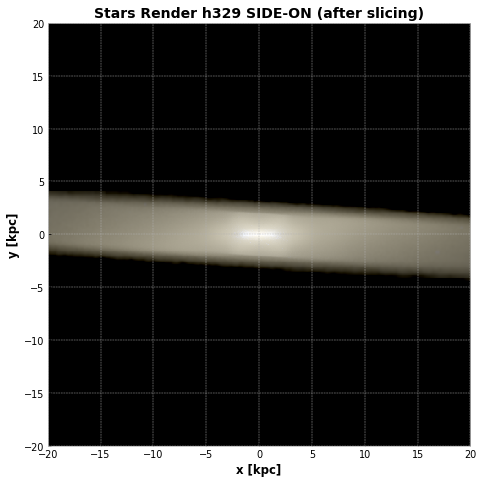

In [7]:
pynbody.analysis.angmom.sideon(h329_h1.s)

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_s_disk, width = '40 kpc', dynamic_range=8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 SIDE-ON (after slicing)', fontweight='bold')

pynbody.analysis.angmom.faceon(h329_s_disk);

## Profiles

### Radius Versus Stellar Mass

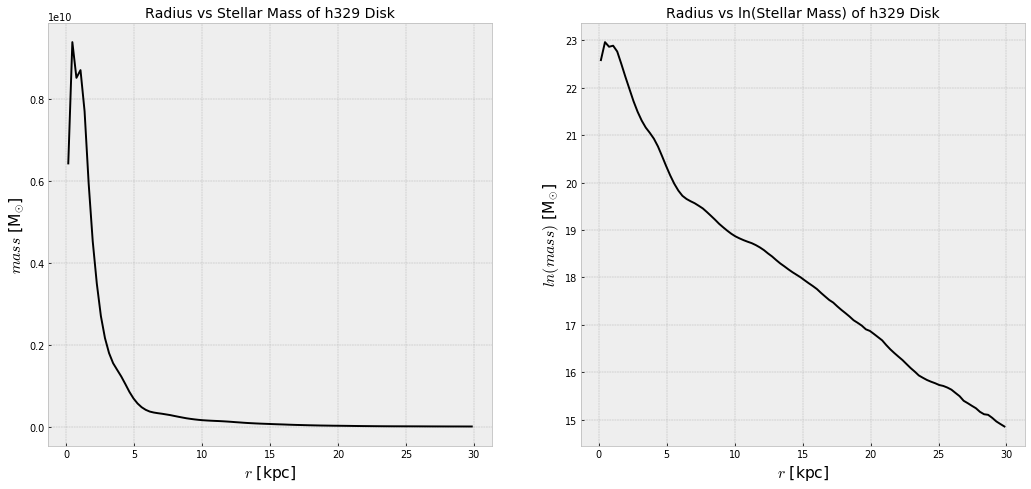

In [10]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_sliced['rbins'].in_units('kpc'), h329_p_s_sliced['mass'].in_units('Msol'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'$mass$ [M$_{\odot}$]', fontsize=16)
axs[0].set_title('Radius vs Stellar Mass of h329 Disk')

axs[1].plot(h329_p_s_sliced['rbins'].in_units('kpc'), np.log(h329_p_s_sliced['mass'].in_units('Msol')),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
axs[1].set_title('Radius vs ln(Stellar Mass) of h329 Disk');

### Best Fit for Radius versus ln(Stellar Mass): Linear Fit

In [11]:
## Defining a linear function
## my_x is the x axis (radius), my_m is the slope, and my_b is the additive constant

def linear(my_x, my_m, my_b):
    y = (my_m*my_x) + my_b
    return y

In [12]:
## We decided above that the best section to do a linear fit on would be from 5 to 20 kpc

## We can define a condition to isolate that section and make arrays specifically for 5-20 kpc
condition = np.logical_and(h329_p_s_sliced['rbins'].in_units('kpc') > 5, h329_p_s_sliced['rbins'].in_units('kpc') < 20)

## Here are the arrays for 5-20 kpc. We will use this in the fitting
my_x_rad = np.extract(condition, h329_p_s_sliced['rbins'].in_units('kpc'))
my_y_mass = np.extract(condition, np.log(h329_p_s_sliced['mass'].in_units('Msol')))

In [13]:
## I am using curve_fit function and defining the fit parameters as fitpars_lin and the error as error_lin
fitpars_lin, error_lin = curve_fit(linear, my_x_rad, my_y_mass)

## fitpars_lin returns our fit variables as (m, b) or (slope, additive constant)
fitpars_lin

array([-0.20799307, 21.0433427 ])

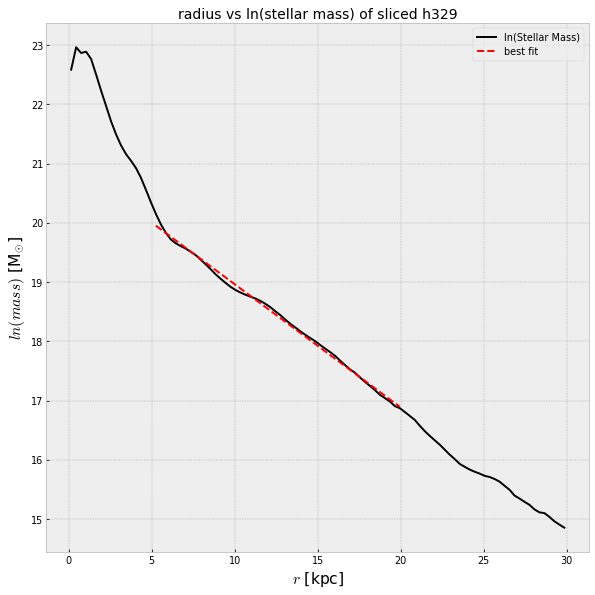

In [14]:
## Let's see the best fit line!

## Graph our original radius versus ln(stellar mass) and add in the fit line calculated above

fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_sliced['rbins'].in_units('kpc'), np.log(h329_p_s_sliced['mass'].in_units('Msol')),'k', label='ln(Stellar Mass)') 
plt.plot(my_x_rad, linear(my_x_rad, *fitpars_lin), linestyle='--', color='r', label='best fit')
    ## Must use my_x_rad which was specifically the 5-20 kpc arrays we used to make the fit!!
plt.xlabel('$r$ [kpc]', fontsize=16)
plt.ylabel(r'$ln(mass)$ [M$_{\odot}$]', fontsize=16)
plt.title('radius vs ln(stellar mass) of sliced h329')
plt.legend();

In [15]:
## Let's see the error in the parameters for the value of m and b!

perr = np.sqrt(np.diag(error_lin))
perr

array([0.00178118, 0.02373057])

In [16]:
## Now we can find the scale length using the fitted line and variables

my_r_0 = -1 / fitpars_lin[0] ##fitpars_lin[0] is just the fitted m (slope) value

print(my_r_0)

4.807852585953706


## Exploring Age Relations

In [19]:
h329_p_s_sliced['age']

SimArray([5.68481069, 6.02185392, 5.84110919, 5.14339199, 5.00878267,
          5.25743587, 5.51893974, 5.76330619, 6.04211754, 6.26745681,
          6.42891538, 6.53980689, 6.57387967, 6.59022857, 6.64865676,
          6.72450935, 6.80496332, 6.87137902, 6.92261241, 6.94782209,
          6.95645308, 6.93228377, 6.89917819, 6.87359914, 6.86664664,
          6.87404995, 6.89359427, 6.91472386, 6.95069493, 6.98255245,
          6.99923502, 7.01516131, 7.02476917, 7.02832303, 7.03315385,
          7.02115182, 7.01838714, 7.01946122, 7.02052808, 7.02294131,
          7.03828519, 7.04603883, 7.07329814, 7.09469536, 7.10513315,
          7.12634682, 7.15011179, 7.15647682, 7.17052242, 7.17661816,
          7.19605726, 7.19668617, 7.21211563, 7.20982062, 7.2442131 ,
          7.24647071, 7.27474083, 7.28791572, 7.31230719, 7.32841606,
          7.35374499, 7.38857231, 7.41846984, 7.45292255, 7.45286157,
          7.47231525, 7.50417959, 7.52739465, 7.56404972, 7.58855283,
          7.60193305

/home1/09216/mmiller1/.local/lib/python3.7/site-packages/pynbody/snapshot/tipsy.py:1039: RuntimeWarning: invalid value encountered in log10
  return np.log10(self['FeMassFrac'] / self['hydrogen']) - np.log10(XSOLFe / XSOLH)
/opt/apps/intel18/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


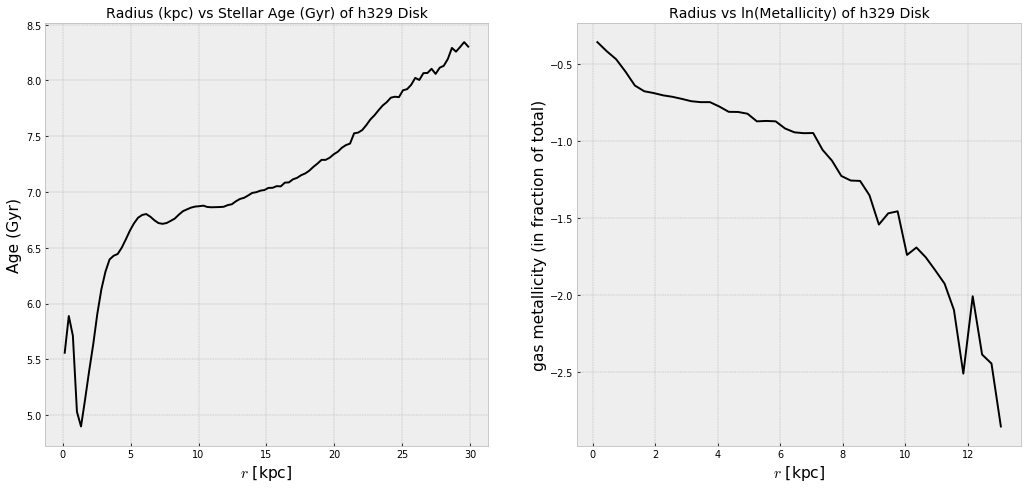

In [7]:
## Radius versus Stellar Mass: exponential and linear side by side comparison

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_sliced['rbins'].in_units('kpc'), h329_p_s_sliced['age'].in_units('Gyr'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'Age (Gyr)', fontsize=16)
axs[0].set_title('Radius (kpc) vs Stellar Age (Gyr) of h329 Disk')

axs[1].plot(h329_p_g_sliced['rbins'].in_units('kpc'), np.log(h329_p_g_sliced['feh']),'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'gas metallicity (in fraction of total)', fontsize=16)
axs[1].set_title('Radius vs ln(Metallicity) of h329 Disk');